In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-ship/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

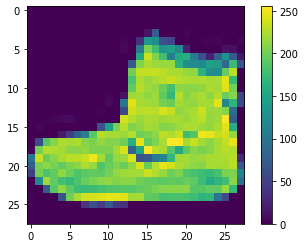

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#normalizacja danych
train_images = train_images/255.0
test_images = test_images/255.0

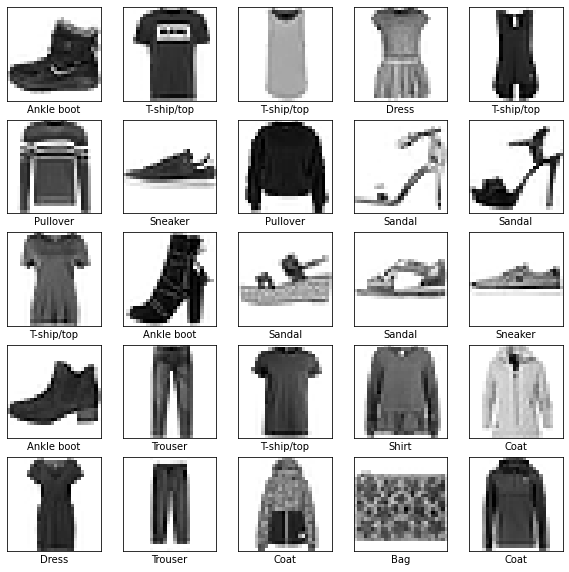

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
#budowa modelu
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
#kompilacja modelu
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5059 - accuracy: 0.8212
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3161 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2977 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2712 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2485 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

In [13]:
#ocena dokładności modelu
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.3216 - accuracy: 0.8882 - 616ms/epoch - 2ms/step
Test accuracy: 0.8881999850273132
